## EDA

In [ ]:
#Librerias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils as eda


##### READ

In [13]:
URL='https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv'
df = pd.read_csv(URL, sep=',', encoding='utf-8', quotechar='"')
target= 'charges'

##### DS

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


ANALISIS DESCRIBE DS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Revision de duplicados

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [7]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


##### ANALISIS UNIVARIABLE

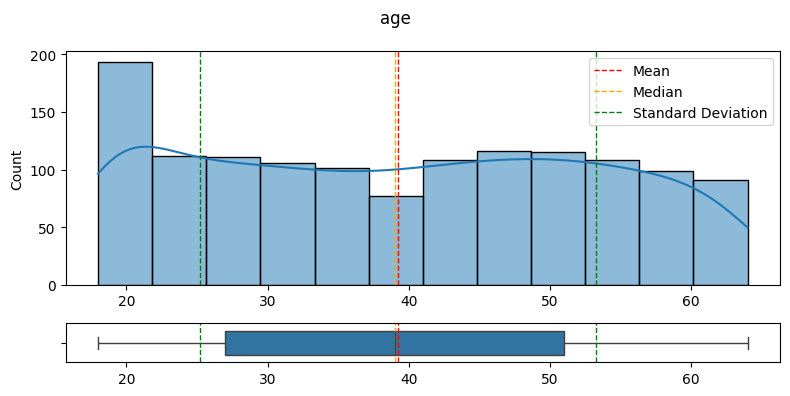

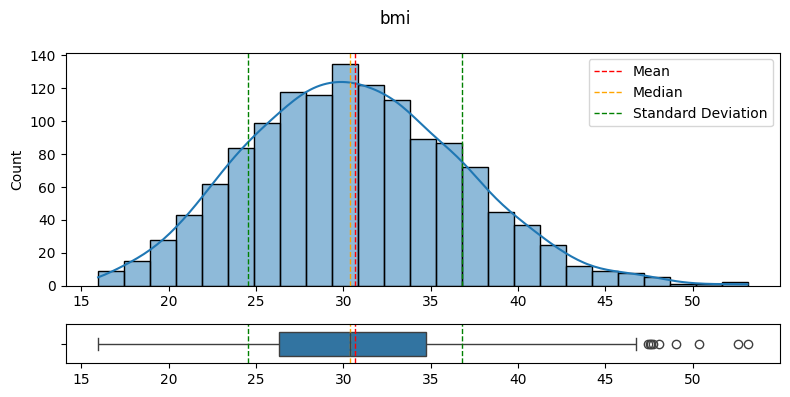

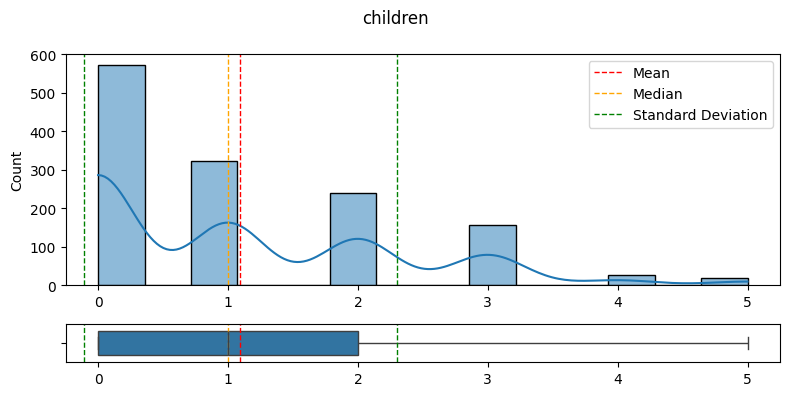

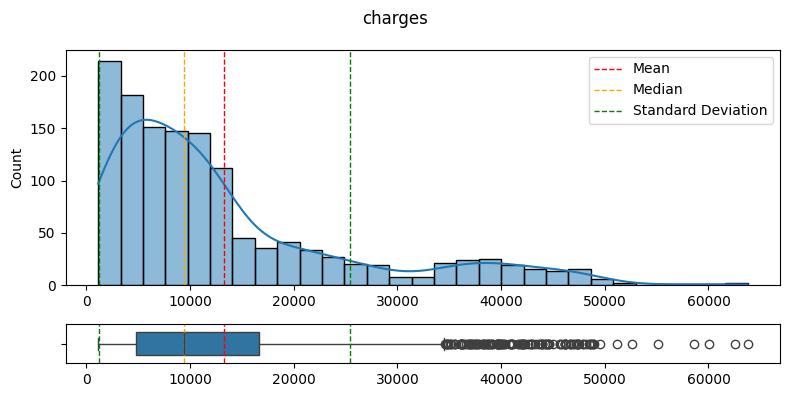

In [8]:
eda.plot_numerical_data(df)

In [16]:
bmi_df=(df['bmi'] > 30).mean() * 100
print(f'Promedio de BMI: {bmi_df:.2f}%')

Promedio de BMI: 52.69%


`age` me indica que los pacientes estudiados tienen una media (mean) de 40 años, pero se han estudiado mas pacientes de 20 años.

`bmi` me indica que existe un promedio de los pacientes del 53% de BMI mayor a 30(obesidad de grado 1 o superior).

`children` mayormente los pacientes no tienen hijos, y hay un promedio de un niño/a por persona.

`charges` Existe una gran cantidad de outliers pero puede que esa informacion me ayude al modelo de prediccion


Text(0.5, 1.0, 'Distribución de fumadores')

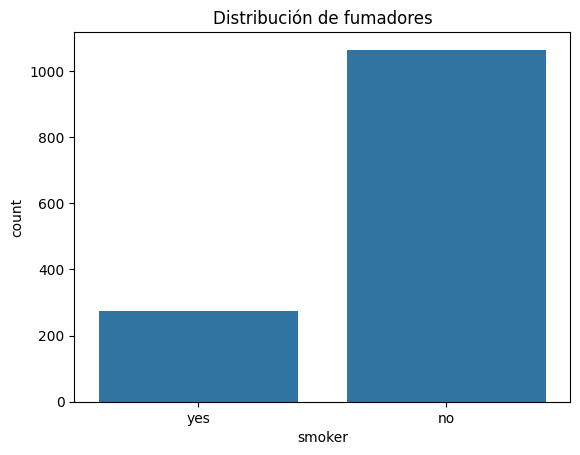

In [17]:
sns.countplot(data=df, x='smoker')
plt.title('Distribución de fumadores')

Hay un gran indice de clientes no fumadores

##### ANALISIS BIVARIABLE VS TARGET

<Axes: xlabel='bmi', ylabel='charges'>

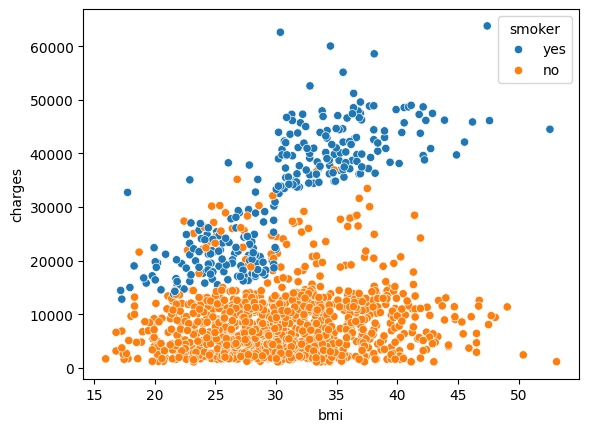

In [18]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)